<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [13]:
!pip install requests


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import requests

# The URL of the database file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite"
# The local filename to save it as
filename = 'survey-results-public.sqlite'

print("Downloading database file...")

try:
    # Send a GET request to the URL
    response = requests.get(url, stream=True)
    response.raise_for_status() # Raise an exception for bad status codes (4xx or 5xx)

    # Write the content to a local file
    with open(filename, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    
    print(f"File '{filename}' downloaded successfully. ✅")

except requests.exceptions.RequestException as e:
    print(f"An error occurred during download: {e}")

File 'survey-results-public.sqlite' downloaded successfully. ✅


In [1]:
url=  "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite"

#### 2. Connect to the Database


**Install the needed libraries**


In [15]:
!pip install pandas


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
!pip install matplotlib


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


In [18]:
# Query to find all table names in the database
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""

# Execute the query and print the result
print(pd.read_sql_query(QUERY, conn))

  Table_Name
0       main


#### Demo 1: Count the Number of Rows in the Table


In [19]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [20]:
# Query to find all table names in the database
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""


print(pd.read_sql_query(QUERY, conn))


  Table_Name
0       main


In [26]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""

df = pd.read_sql_query(QUERY, conn)
print(df)

   COUNT(*)
0     65437


#### Demo 3: Group Data by Age


In [22]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


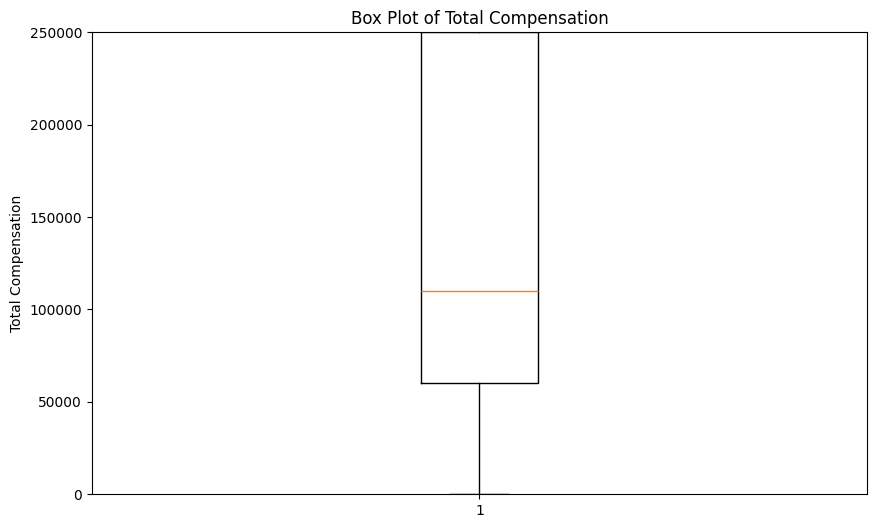

In [27]:
# your code goes here
QUERY = """
SELECT CompTotal
FROM main
"""
df_comp = pd.read_sql_query(QUERY, conn)

# Clean the data
df_comp['CompTotal'] = pd.to_numeric(df_comp['CompTotal'], errors='coerce')
df_comp.dropna(subset=['CompTotal'], inplace=True)

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_comp['CompTotal'])
plt.title('Box Plot of Total Compensation')
plt.ylabel('Total Compensation')
# Filter out extreme outliers for better visualization
plt.ylim(0, 250000)
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


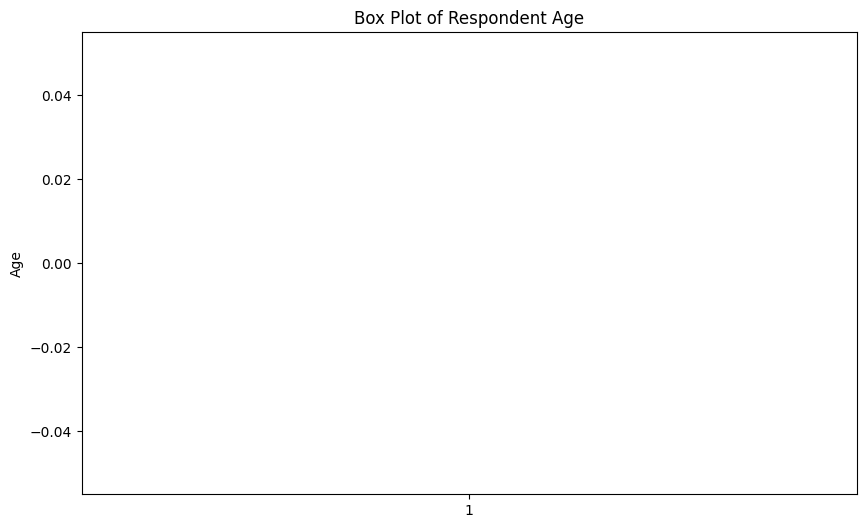

In [28]:
# your code goes here
QUERY = """
SELECT Age
FROM main
"""
df_age = pd.read_sql_query(QUERY, conn)

# Convert 'Age' to a numeric type, coercing errors to NaN, then drop them
df_age['Age'] = pd.to_numeric(df_age['Age'], errors='coerce')
df_age.dropna(subset=['Age'], inplace=True)

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df_age['Age'])
plt.title('Box Plot of Respondent Age')
plt.ylabel('Age')
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_6556\1917481148.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=labels)


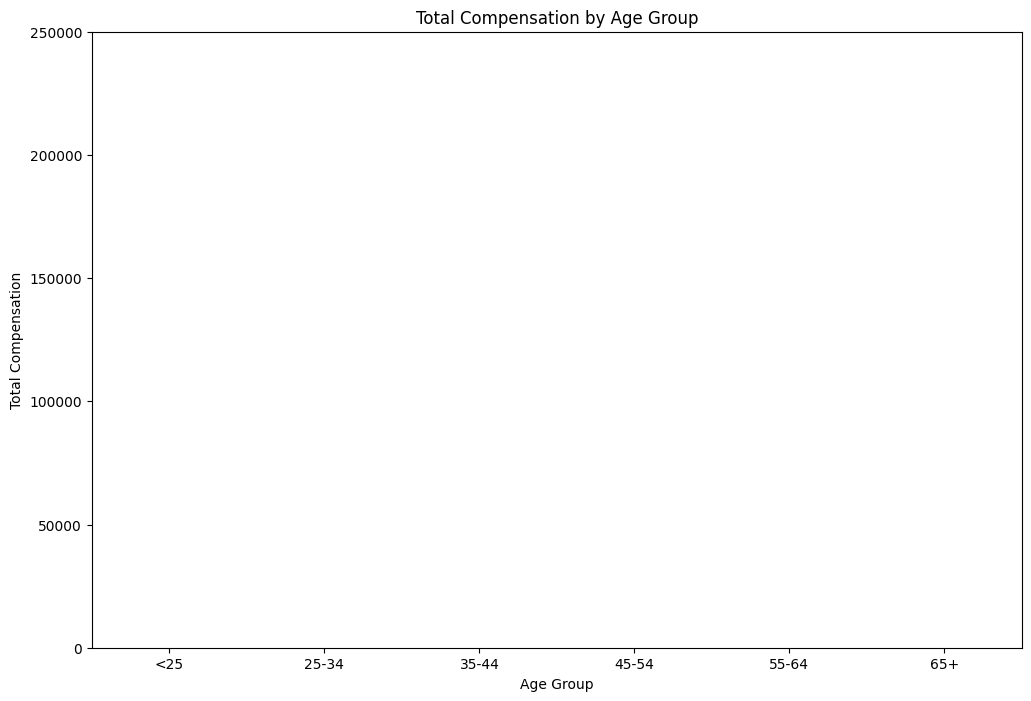

In [29]:
# your code goes here
QUERY = """
SELECT Age, CompTotal
FROM main
"""
df_age_comp = pd.read_sql_query(QUERY, conn)

# Clean and convert columns to numeric
df_age_comp['Age'] = pd.to_numeric(df_age_comp['Age'], errors='coerce')
df_age_comp['CompTotal'] = pd.to_numeric(df_age_comp['CompTotal'], errors='coerce')
df_age_comp.dropna(subset=['Age', 'CompTotal'], inplace=True)

# Create age groups
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df_age_comp['AgeGroup'] = pd.cut(df_age_comp['Age'], bins=bins, labels=labels, right=False)

# Prepare data for boxplot
data_to_plot = [df_age_comp['CompTotal'][df_age_comp['AgeGroup'] == group] for group in labels]

# Plot the box plot
plt.figure(figsize=(12, 8))
plt.boxplot(data_to_plot, labels=labels)
plt.title('Total Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.ylim(0, 250000) # Filter outliers for readability
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_6556\1004108278.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=groups)


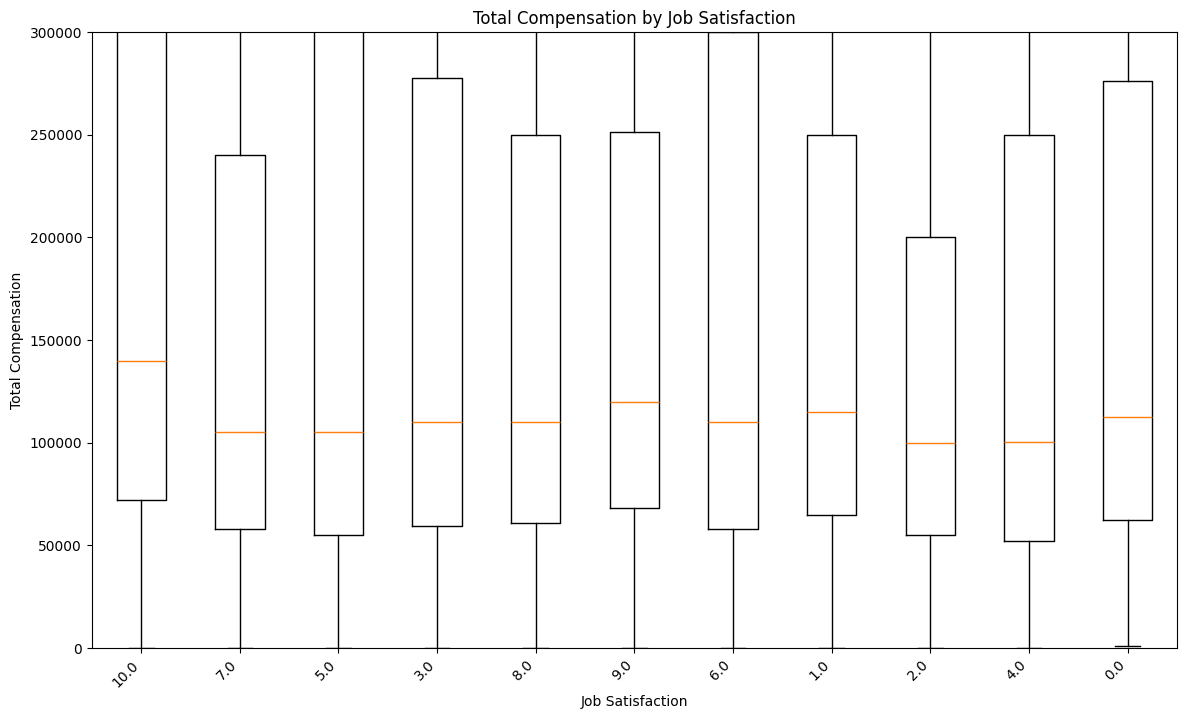

In [30]:
# your code goes here
QUERY = """
SELECT JobSat, CompTotal
FROM main
"""
df_jobsat_comp = pd.read_sql_query(QUERY, conn)

# Clean data
df_jobsat_comp.dropna(subset=['JobSat', 'CompTotal'], inplace=True)

# Prepare data for plotting
groups = df_jobsat_comp['JobSat'].unique()
data_to_plot = [df_jobsat_comp['CompTotal'][df_jobsat_comp['JobSat'] == group] for group in groups]

plt.figure(figsize=(14, 8))
plt.boxplot(data_to_plot, labels=groups)
plt.title('Total Compensation by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 300000) # Filter outliers
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_6556\4163773379.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=top_5_devs)


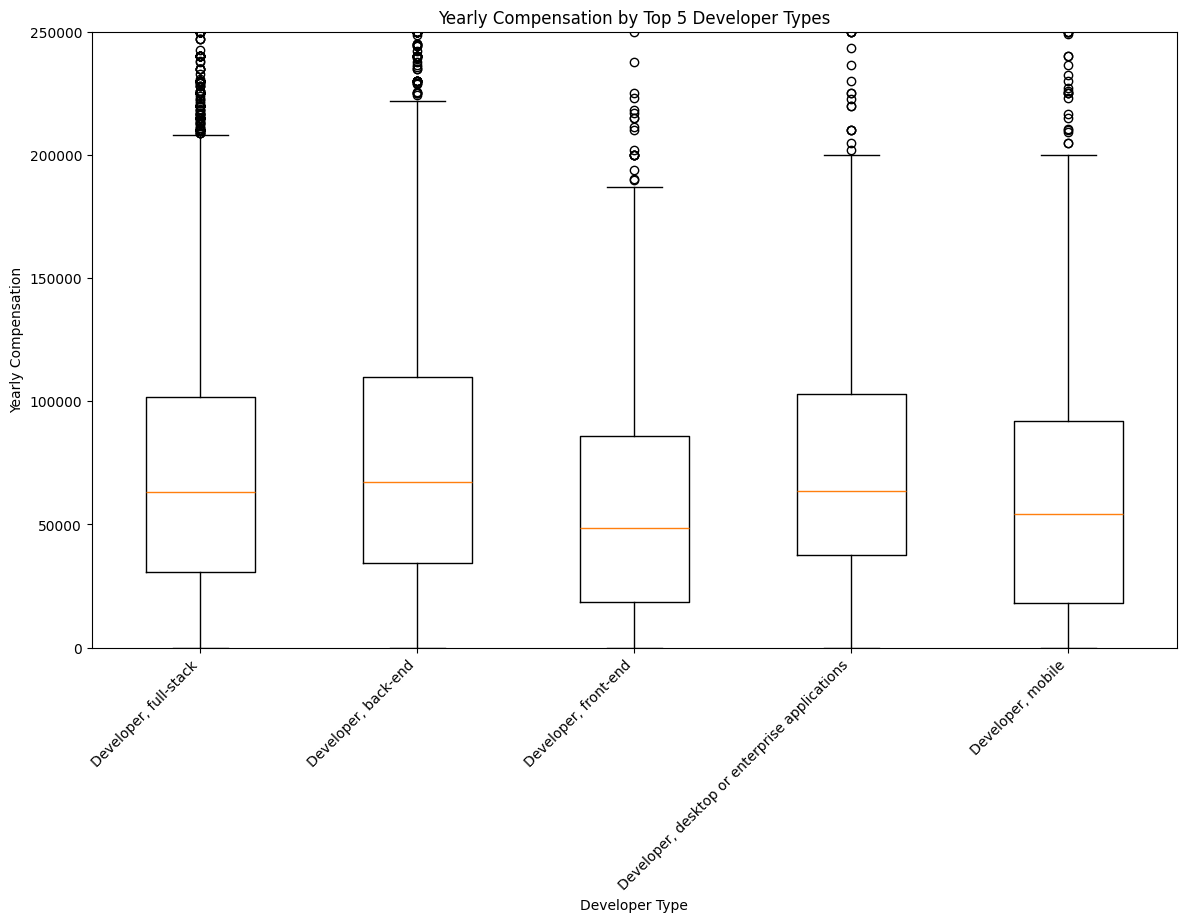

In [31]:
# your code goes here
QUERY = """
SELECT DevType, ConvertedCompYearly
FROM main
"""
df_dev = pd.read_sql_query(QUERY, conn)
df_dev.dropna(inplace=True)

# Find the top 5 developer types
top_5_devs = df_dev['DevType'].str.split(';', expand=True).stack().value_counts().head(5).index.tolist()

# Filter the DataFrame for each of the top 5 dev types and collect the data
data_to_plot = []
for dev in top_5_devs:
    subset = df_dev[df_dev['DevType'].str.contains(dev, na=False)]
    data_to_plot.append(subset['ConvertedCompYearly'])

plt.figure(figsize=(14, 8))
plt.boxplot(data_to_plot, labels=top_5_devs)
plt.title('Yearly Compensation by Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Yearly Compensation')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 250000)
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_6556\3229969485.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=top_5_countries)


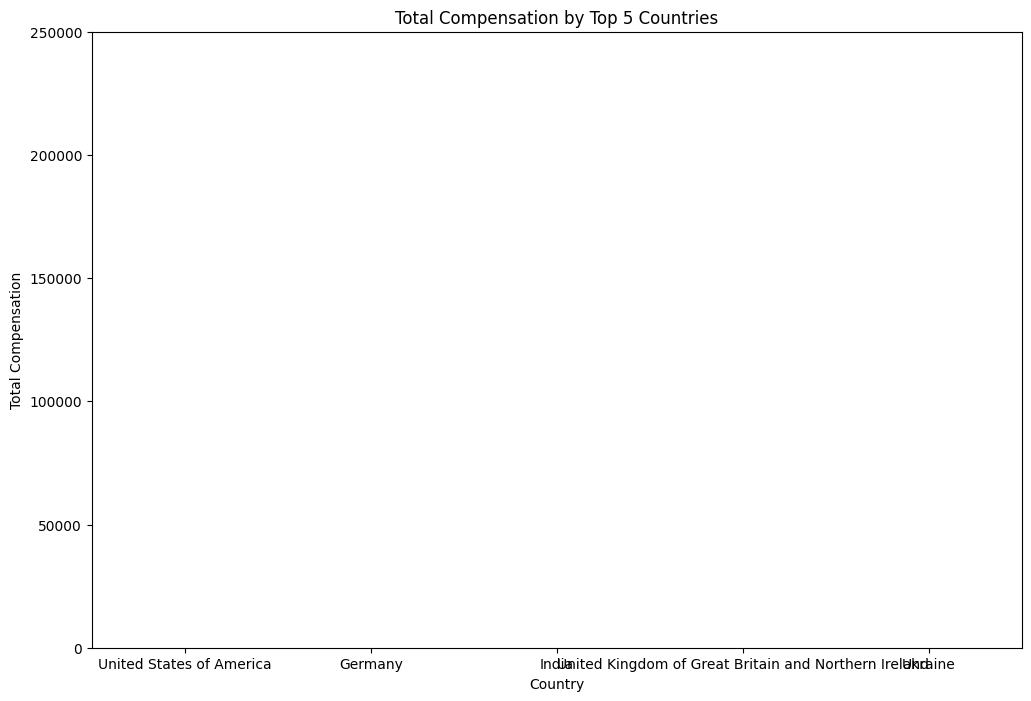

In [32]:
# your code goes here
QUERY = """
SELECT Country, CompTotal
FROM main
"""
df_country_comp = pd.read_sql_query(QUERY, conn)

# Find the top 5 countries
top_5_countries = df_country_comp['Country'].value_counts().head(5).index.tolist()

# Filter for top 5 countries and prepare data
data_to_plot = [df_country_comp['CompTotal'][df_country_comp['Country'] == country] for country in top_5_countries]

plt.figure(figsize=(12, 8))
plt.boxplot(data_to_plot, labels=top_5_countries)
plt.title('Total Compensation by Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Compensation')
plt.ylim(0, 250000)
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_6556\760581297.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=groups)


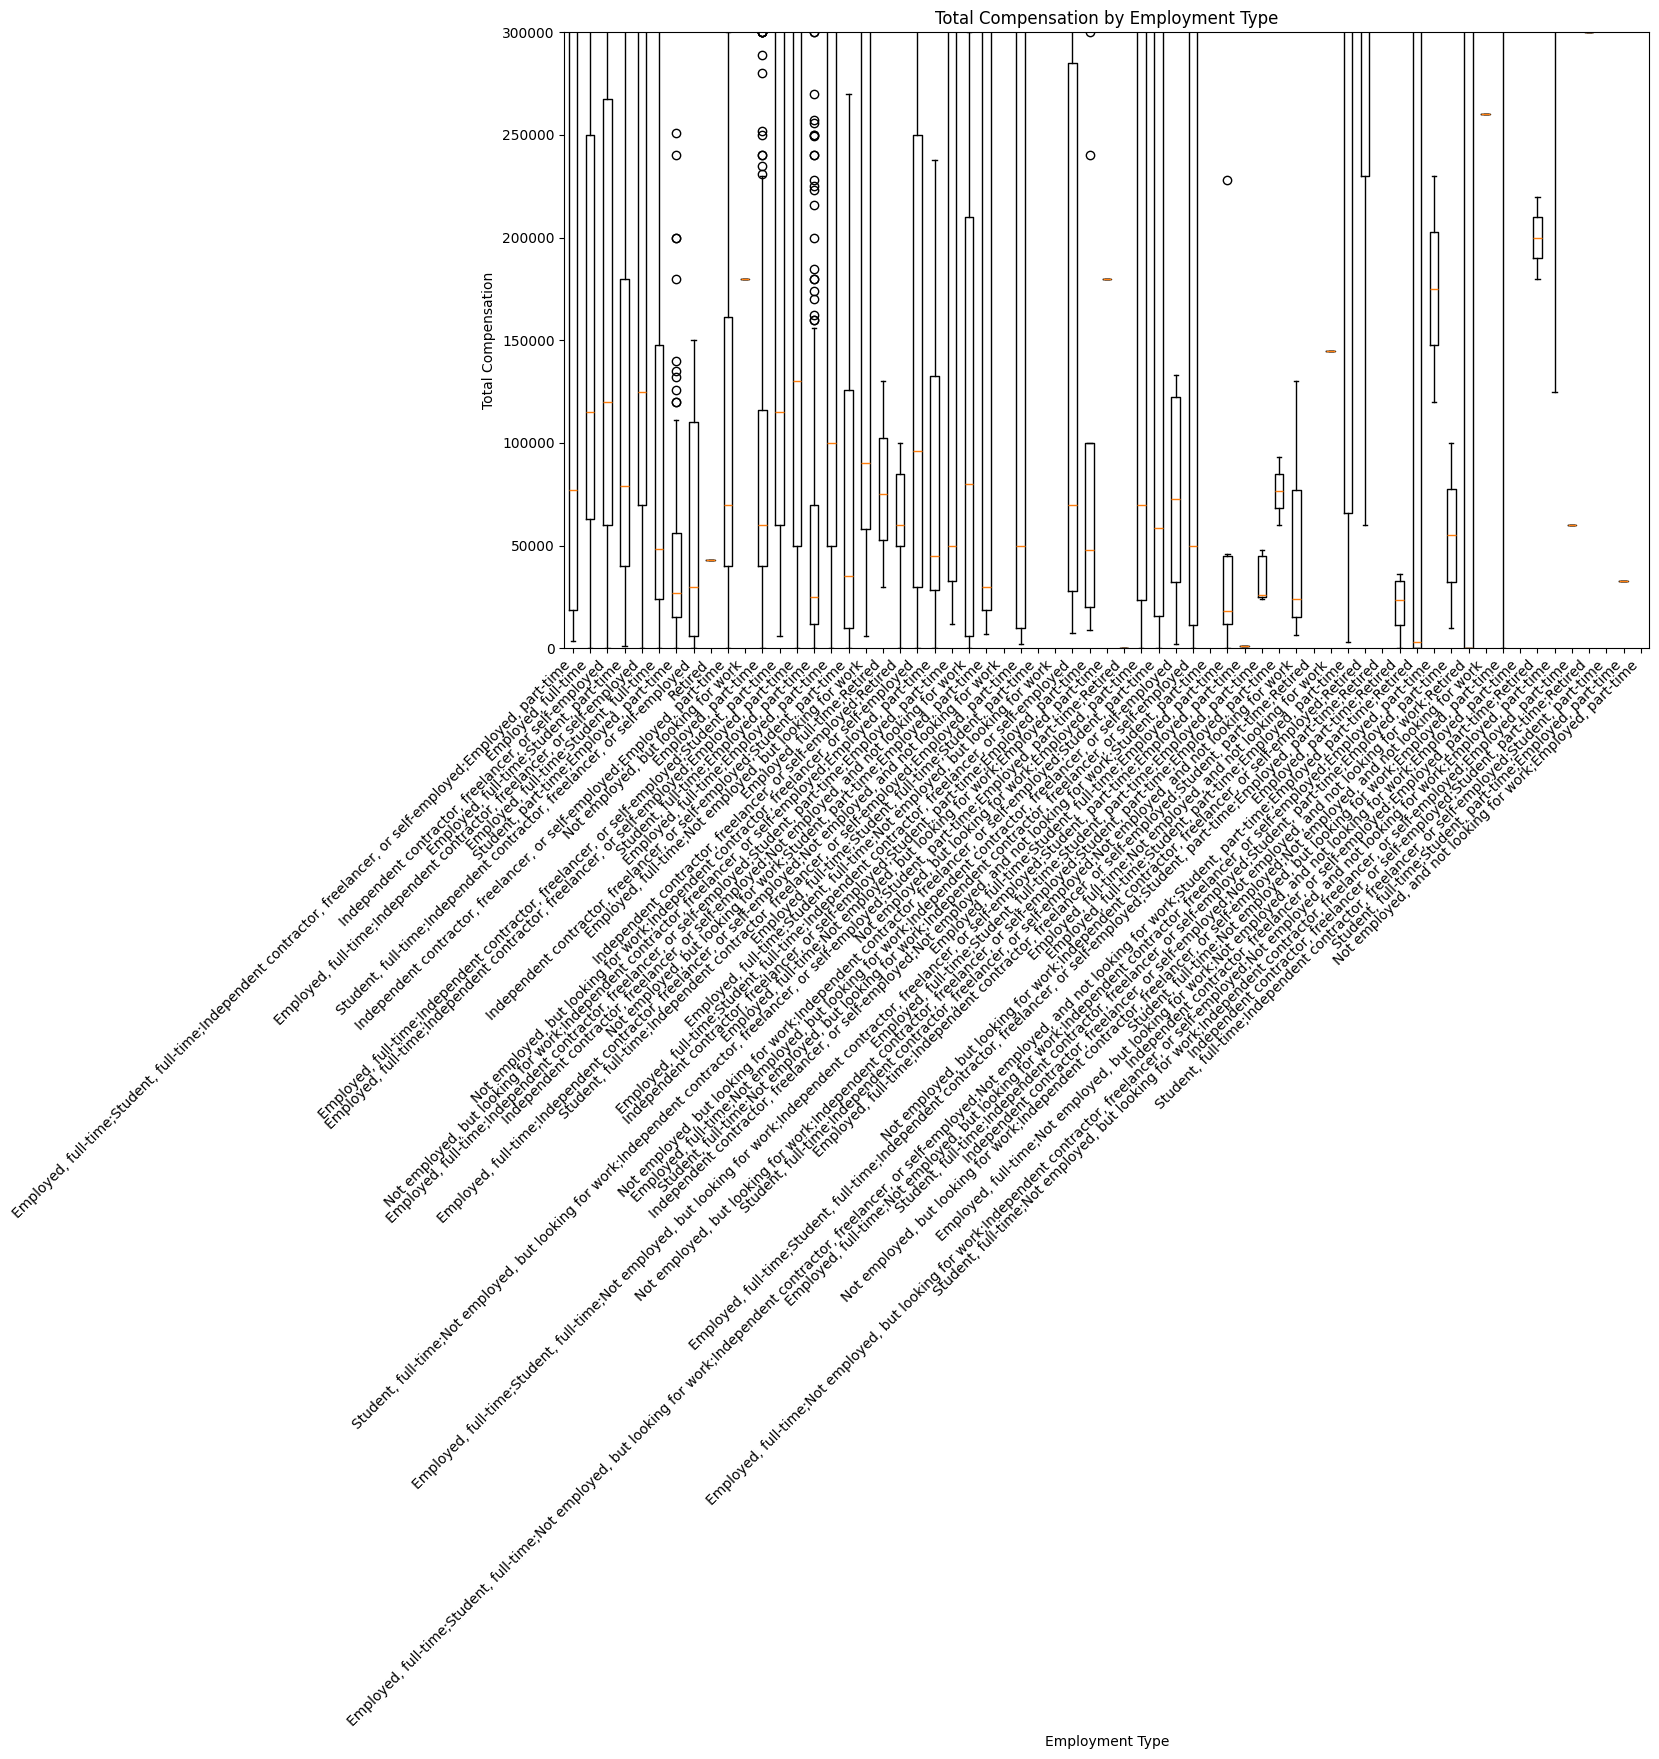

In [33]:
# your code goes here
QUERY = """
SELECT Employment, CompTotal
FROM main
"""
df_emp_comp = pd.read_sql_query(QUERY, conn)
df_emp_comp.dropna(inplace=True)

# Prepare data for plotting
groups = df_emp_comp['Employment'].unique()
data_to_plot = [df_emp_comp['CompTotal'][df_emp_comp['Employment'] == group] for group in groups]


plt.figure(figsize=(14, 8))
plt.boxplot(data_to_plot, labels=groups)
plt.title('Total Compensation by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 300000)
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_6556\1365781615.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=groups)


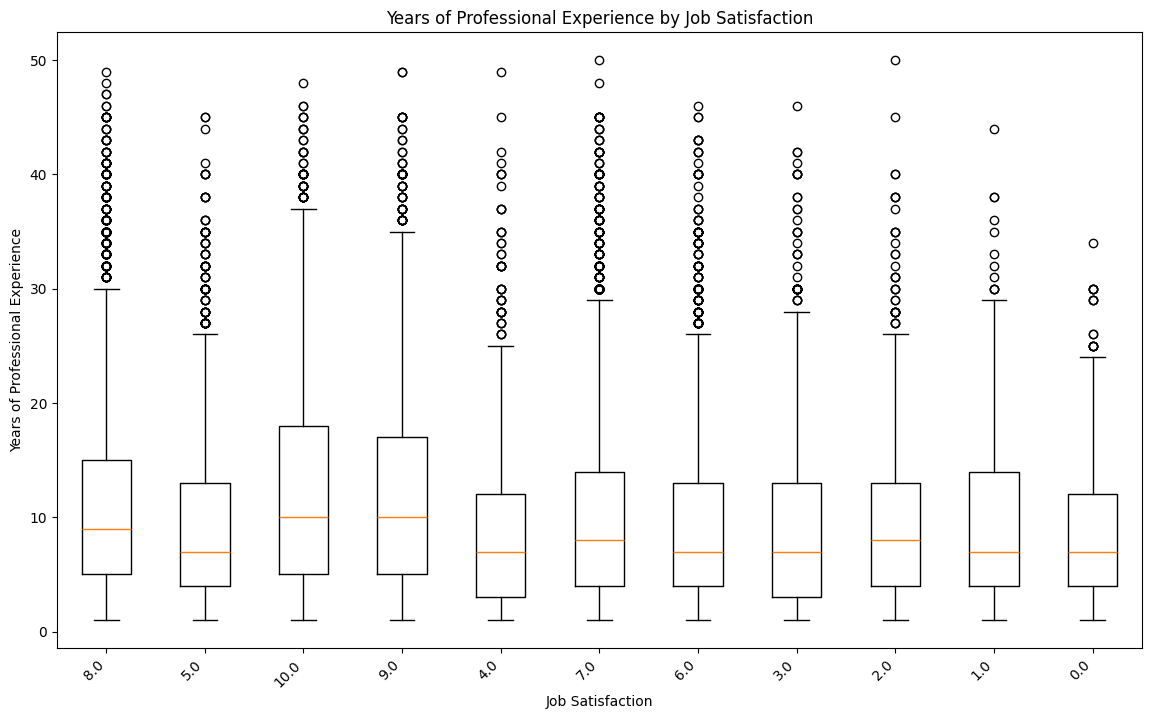

In [34]:
# your code goes here
QUERY = """
SELECT JobSat, YearsCodePro
FROM main
"""
df_exp_jobsat = pd.read_sql_query(QUERY, conn)

# Clean and convert YearsCodePro to numeric
df_exp_jobsat['YearsCodePro'] = pd.to_numeric(df_exp_jobsat['YearsCodePro'], errors='coerce')
df_exp_jobsat.dropna(inplace=True)

# Prepare data for plotting
groups = df_exp_jobsat['JobSat'].unique()
data_to_plot = [df_exp_jobsat['YearsCodePro'][df_exp_jobsat['JobSat'] == group] for group in groups]


plt.figure(figsize=(14, 8))
plt.boxplot(data_to_plot, labels=groups)
plt.title('Years of Professional Experience by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Years of Professional Experience')
plt.xticks(rotation=45, ha='right')
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [35]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
